<a href="https://colab.research.google.com/github/Pritush09/DeepLearning-Pytorch/blob/master/01_Pytorch_WorkFlow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Where can can you get help?
All of the materials for this course are available on GitHub.(https://github.com/mrdbourke/pytorch-deep-learning)

And if you run into trouble, you can ask a question on the Discussions page there too.

There's also the PyTorch developer forums(https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

Let's start by putting what we're covering into a dictionary to reference later.

We're going to get 

torch

`torch.nn` (nn stands for neural network and this package contains the building 
blocks for creating neural networks in PyTorch) and 

matplotlib.

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu118'


# 1. Data (preparing and loading)
I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

machine learning is a game of two parts: 1. turn your data into a representative set of numbers and 2. build or pick a model to learn the representation as best as possible

### Machine learning is a game of two parts:

Turn your data, whatever it is, into numbers (a representation).

Pick or build a model to learn the representation as best as possible.

let's create our data as a straight line.

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [2]:
torch.arange(0,1,0.01)

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [3]:
torch.arange(0,1,0.01).shape

torch.Size([100])

In [4]:
torch.arange(0,1,0.01).unsqueeze(dim=1)

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000],
        [0.1100],
        [0.1200],
        [0.1300],
        [0.1400],
        [0.1500],
        [0.1600],
        [0.1700],
        [0.1800],
        [0.1900],
        [0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900],
        [0.3000],
        [0.3100],
        [0.3200],
        [0.3300],
        [0.3400],
        [0.3500],
        [0.3600],
        [0.3700],
        [0.3800],
        [0.3900],
        [0.4000],
        [0.4100],
        [0.4200],
        [0.4300],
        [0.4400],
        [0.4500],
        [0.4600],
        [0.4700],
        [0.4800],
        [0.4900],
        [0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0

In [5]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)# later on why we use this unsqueez 
y = weight * X + bias

X[:10], y[:10] , X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

https://www.learnpytorch.io/01_pytorch_workflow/#split-data-into-training-and-test-sets

In [6]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  # The prop keyword is used to change the font size property. It is used in Matplotlib as Using a prop keyword for changing the font size in legend.
  plt.legend(prop={"size": 14});

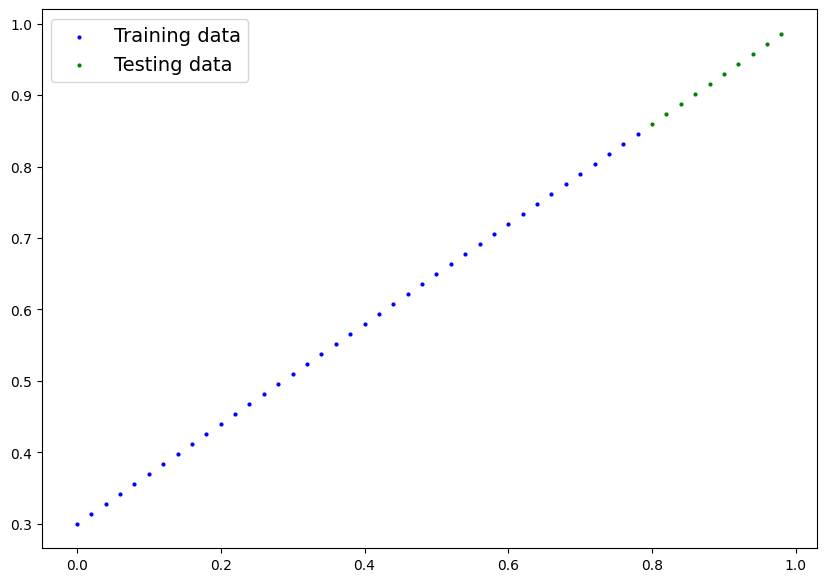

In [8]:
plot_predictions()

Parameters are Tensor subclasses, that have a very special property when used with Module s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too.

In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                    requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

* nn.Module contains the larger building blocks (layers)
* nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

# Checking the contents of a PyTorch model
Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using .parameters().

In [10]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using `.state_dict()`.

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


Notice how the values for weights and bias from model_0.state_dict() come out as random float tensors?

This is becuase we initialized them above using torch.randn().

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded weight and bias values we set when creating our straight line data).

Because our model starts with random values, right now it'll have poor predictive power.

In [12]:
# Making prediction
with torch.inference_mode(): 
    y_preds = model_0(X_test)

why we used this to test model becz we dont want to track the gd of the number which we are just testing
more here  -  https://twitter.com/PyTorch/status/1437838231505096708?s=20

In [13]:
y_preds , y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

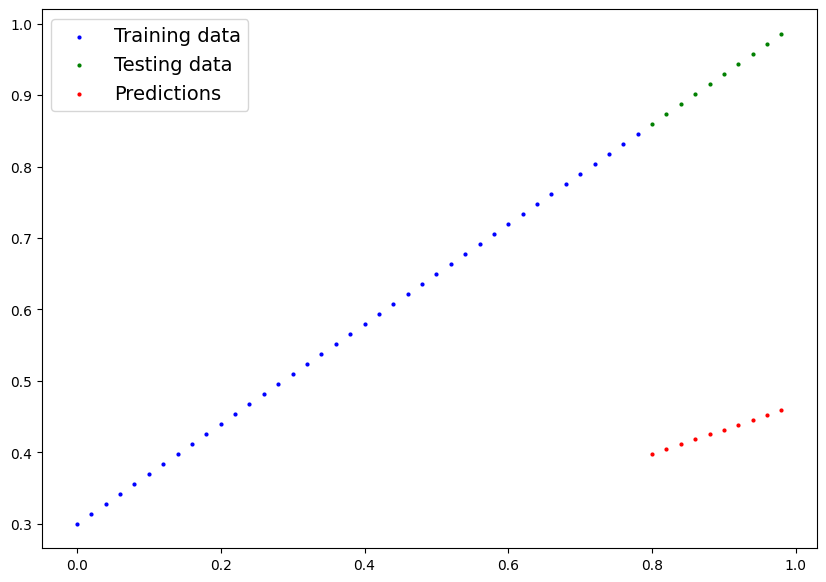

In [14]:
plot_predictions(predictions=y_preds)


Notice how there's one prediction value per testing sample.

This is because of the kind of data we're using. For our straight line, one X value maps to one y value.

However, machine learning models are very flexible. You could have 100 X values mapping to one, two, three or 10 y values. It all depends on what you're working on

In [15]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

#  Train model¶
Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.


#Creating a loss function and optimizer in PyTorch
For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a loss function as well as an optimizer.

MOre - https://www.learnpytorch.io/01_pytorch_workflow/#2-build-model

Loss MEtric:

Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()).

 Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

 For Optimisation :

 Stochastic gradient descent (torch.optim.SGD()). 
 
 Adam optimizer (torch.optim.Adam()).

For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.

Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use SGD, torch.optim.SGD(params, lr) where:

params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values).

 The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

In [17]:
# Create the loss function
loss_fn = nn.MSELoss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

# creating an optimisation loop in pytorch
The training loop involves the model going through the training data and learning the relationships between the features and labels.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

1	Forward pass	The model goes through all of the training data once, performing its forward() function calculations.	model(x_train)

2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_train)

3	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	optimizer.zero_grad()

4	Perform backpropagation on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	loss.backward()

5	Update the optimizer (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	optimizer.step()

And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:

Calculate the loss (loss = ...) before performing backpropagation on it (loss.backward()).

Zero gradients (optimizer.zero_grad()) before stepping them (optimizer.step()).

Step the optimizer (optimizer.step()) after performing backpropagation on the loss (loss.backward()).

In [48]:
# epoch is the number of time u want to loop through the data 
epochs= 1632

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


# looping through the data point
for epoch in range(epochs):
  # stting the model to training mode to give all the parameter which require Grad to grad
  model_0.train()

  # GOing through the forward pass
  y_pred= model_0(X_train)

  # claculating the loss via loss function of the pytorch
  loss = loss_fn(y_pred,y_train)

  # Zero grad of the optimizer
  optimizer.zero_grad() # this is before the step as we want to start fresh agin when we are loopint through the data 

  # PErofrm backpropagation on the loss w.r.t loss of the model
  loss.backward()

  # Progress the optimizer (perform GD)
  optimizer.step() # how the optimizer changes will accumulate through the loop so for better computing if we want to know the GDs in each step we dont need to do this
  # 

# ---------------------------------------------------------------------------------------------------------------------------
  # Testing phase

  model_0.eval()# this turns off the various model settings which are not needed for the testing purpose


#  we can write the testing code differntly not like this down here

  with torch.inference_mode():
    # 1. Forward pass on test data
    test_pred = model_0(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    # Print out what's happening
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MSE Train Loss: {loss} | MSE Test Loss: {test_loss} ")

Epoch: 0 | MSE Train Loss: 5.08644237839917e-10 | MSE Test Loss: 2.214105565556679e-09 
Epoch: 10 | MSE Train Loss: 5.022384175212835e-10 | MSE Test Loss: 2.1905666169885762e-09 
Epoch: 20 | MSE Train Loss: 4.960509225604426e-10 | MSE Test Loss: 2.170347457308708e-09 
Epoch: 30 | MSE Train Loss: 4.896903438300626e-10 | MSE Test Loss: 2.1490553780978416e-09 
Epoch: 40 | MSE Train Loss: 4.833170530460507e-10 | MSE Test Loss: 2.126754328202196e-09 
Epoch: 50 | MSE Train Loss: 4.769684092131854e-10 | MSE Test Loss: 2.105678076347317e-09 
Epoch: 60 | MSE Train Loss: 4.709033163408094e-10 | MSE Test Loss: 2.0834254321755452e-09 
Epoch: 70 | MSE Train Loss: 4.6490669647347715e-10 | MSE Test Loss: 2.0618675655725838e-09 
Epoch: 80 | MSE Train Loss: 4.5901121792368826e-10 | MSE Test Loss: 2.043212932179017e-09 
Epoch: 90 | MSE Train Loss: 4.5268980231050193e-10 | MSE Test Loss: 2.021556921860679e-09 
Epoch: 100 | MSE Train Loss: 4.4660392051198983e-10 | MSE Test Loss: 1.998587961793419e-09 
Epo

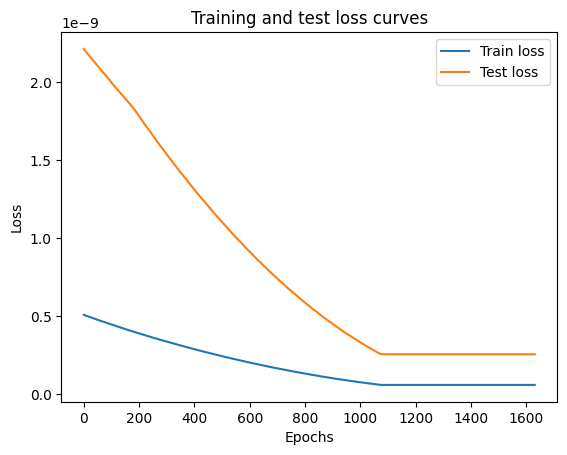

In [49]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Nice! The loss curves show the loss going down over time. Remember, loss is the measure of how wrong your model is, so the lower the better.

But why did the loss go down?

Well, thanks to our loss function and optimizer, the model's internal parameters (weights and bias) were updated to better reflect the underlying patterns in the data.

Let's inspect our model's .state_dict() to see see how close our model gets to the original values we set for weights and bias.

In [50]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Our model got very close to calculate the exact original values for weight and bias and after tweeking the epoch value from 100 to 1631 the model is doing perfect

# Making predictions with a trained PyTorch model (inference)
Once you've trained a model, you'll likely want to make predictions with it.

We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

Set the model in evaluation mode (model.eval()).

Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).

All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.

In [53]:
model_0.eval()

with torch.inference_mode():
  y_pred_new = model_0(X_test)

print(y_pred_new)

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


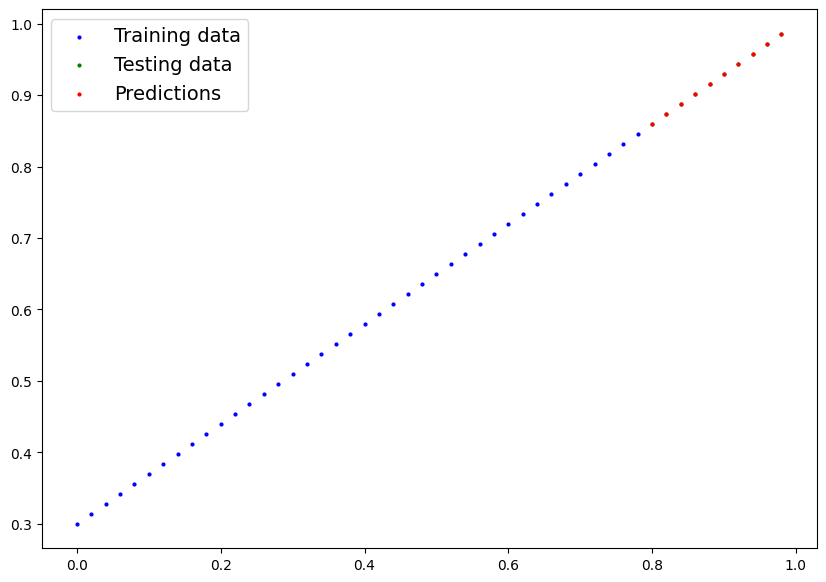

In [52]:
plot_predictions(predictions=y_pred_new)

#Saving and loading a PyTorch model
If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the PyTorch saving and loading models guide):

PyTorch method	What does it do?

torch.save	Saves a serialzed object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.

torch.load	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).

torch.nn.Module.load_state_dict	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

`NOTE:` As stated in Python's pickle documentation, the pickle module is not secure. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.

Recommended way - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference


###Saving a PyTorch model's state_dict()
The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

Let's see how we can do that in a few steps:

We'll create a directory for saving models to called models using Python's pathlib module.

We'll create a file path to save the model to.

We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.

`Note:` It's common convention for PyTorch saved models or objects to end with .pt or .pth, like saved_model_01.pth.